# **_Concrete Compressive Strength Prediction model_**

### __*This Neural Network is supposed to determine how strong is a concrete mix going to be*__

<br>

### __*Import Libraries and choose the device*__

In [74]:
# Datasets
import seaborn
import datatable as dt
import matplotlib.pyplot as plt

# Torch libraries
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split

# Device config
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')
if torch.has_mps:
    device = torch.device('mps')
print('Using the Processor') if device == torch.device('cpu') else print('Using the Graphics Card')

import warnings
warnings.filterwarnings('ignore')
pass

Using the Graphics Card


<br>

### __*Prepare the dataset*__

In [75]:
# Show structure of dataset
concrete_raw = dt.fread('Concrete_Data.csv').to_pandas()
concrete_raw.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [76]:
concrete_raw.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [77]:
# Show all relationships
show = False
if show:
    seaborn.pairplot(concrete_raw)
    pass

In [78]:
# Show all relationships to strength
if show:
    n_rows = 8
    fig_concrete, axs_concrete = plt.subplots(nrows=n_rows, ncols=1, figsize=[15,5*n_rows])

    axs_concrete[0].scatter(concrete_raw['Concrete compressive strength(MPa, megapascals) '],
                            concrete_raw['Cement (component 1)(kg in a m^3 mixture)'])
    axs_concrete[0].grid(linestyle='--', linewidth=0.5)
    axs_concrete[0].set_xlabel('Concrete compressive strength')
    axs_concrete[0].set_ylabel('Cement')

    axs_concrete[1].scatter(concrete_raw['Concrete compressive strength(MPa, megapascals) '],
                            concrete_raw['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'])
    axs_concrete[1].grid(linestyle='--', linewidth=0.5)
    axs_concrete[1].set_xlabel('Concrete compressive strength')
    axs_concrete[1].set_ylabel('Blast Furnace Slag')

    axs_concrete[2].scatter(concrete_raw['Concrete compressive strength(MPa, megapascals) '],
                            concrete_raw['Fly Ash (component 3)(kg in a m^3 mixture)'])
    axs_concrete[2].grid(linestyle='--', linewidth=0.5)
    axs_concrete[2].set_xlabel('Concrete compressive strength')
    axs_concrete[2].set_ylabel('Fly Ash')

    axs_concrete[3].scatter(concrete_raw['Concrete compressive strength(MPa, megapascals) '],
                            concrete_raw['Water  (component 4)(kg in a m^3 mixture)'])
    axs_concrete[3].grid(linestyle='--', linewidth=0.5)
    axs_concrete[3].set_xlabel('Concrete compressive strength')
    axs_concrete[3].set_ylabel('Water')

    axs_concrete[4].scatter(concrete_raw['Concrete compressive strength(MPa, megapascals) '],
                            concrete_raw['Superplasticizer (component 5)(kg in a m^3 mixture)'])
    axs_concrete[4].grid(linestyle='--', linewidth=0.5)
    axs_concrete[4].set_xlabel('Concrete compressive strength')
    axs_concrete[4].set_ylabel('Superplasticizer')

    axs_concrete[5].scatter(concrete_raw['Concrete compressive strength(MPa, megapascals) '],
                            concrete_raw['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'])
    axs_concrete[5].grid(linestyle='--', linewidth=0.5)
    axs_concrete[5].set_xlabel('Concrete compressive strength')
    axs_concrete[5].set_ylabel('Coarse Aggregate')

    axs_concrete[6].scatter(concrete_raw['Concrete compressive strength(MPa, megapascals) '],
                            concrete_raw['Fine Aggregate (component 7)(kg in a m^3 mixture)'])
    axs_concrete[6].grid(linestyle='--', linewidth=0.5)
    axs_concrete[6].set_xlabel('Concrete compressive strength')
    axs_concrete[6].set_ylabel('Fine Aggregate')

    axs_concrete[7].scatter(concrete_raw['Concrete compressive strength(MPa, megapascals) '],
                            concrete_raw['Age (day)'])
    axs_concrete[7].grid(linestyle='--', linewidth=0.5)
    axs_concrete[7].set_xlabel('Concrete compressive strength')
    axs_concrete[7].set_ylabel('Age')
    pass

In [79]:
# Split dataset into data + labels
X = concrete_raw.drop(columns=['Concrete compressive strength(MPa, megapascals) '])
y = concrete_raw[['Concrete compressive strength(MPa, megapascals) ']]

In [80]:
# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

In [81]:
# Turn data into Torch Format
X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())

X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())

<br>

### __*Create the Model*__

In [82]:
class LinearRegression(nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [83]:
model = LinearRegression(8, 1)

criterion = nn.L1Loss()
optimizer = optim.AdamW(model.parameters(), lr=0.0001)

loss_lst = list()
accuracy = list()

num_epochs = 100
len_train = len(X_train)
batch = 32

for epoch in range(num_epochs):
    total_loss = 0
    tmp_outputs = list()
    for delta in range(int(len_train/batch) + 1):
        if delta == int(len_train/batch):
            inputs = X_train[batch*delta:]
            targets = y_train[batch*delta:]
        else:
            inputs = X_train[batch*delta:batch*(delta+1)]
            targets = y_train[batch*delta:batch*(delta+1)]

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 1 == 0:
            total_loss += loss.item()

    if (epoch+1) % 1 == 0:
        loss_lst.append(total_loss/(len_train/batch))

        predictions = model(X_test)
        acc = criterion(predictions, y_test)
        accuracy.append(acc.item())
        if (epoch+1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}| Loss: {total_loss/(len_train/batch)}| Test Loss: {acc.item()}")

        total_loss = 0

Epoch 50/100| Loss: 47.477487442691476| Test Loss: 44.978431701660156
Epoch 100/100| Loss: 20.67199127625236| Test Loss: 20.407346725463867


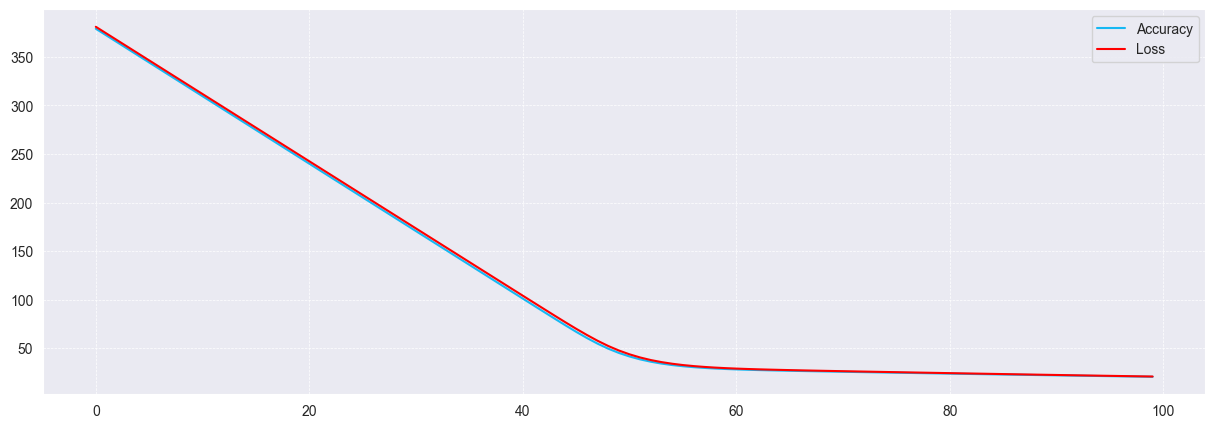

In [84]:
fig_loss, axs_loss = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
accuracy_plot, = axs_loss.plot(accuracy, label='Accuracy', color='#16b8f3')
loss_lst_plot, = axs_loss.plot(loss_lst, label='Loss', color='red')
axs_loss.grid(linestyle='--', linewidth=0.5)
axs_loss.legend(handles=[accuracy_plot, loss_lst_plot])

predictions = model(X_test)

# print("Predictions:")
# for i, x in enumerate(X_test):
#     print(f"Input: {y_test[i]}, Predicted: {predictions[i][0]}")

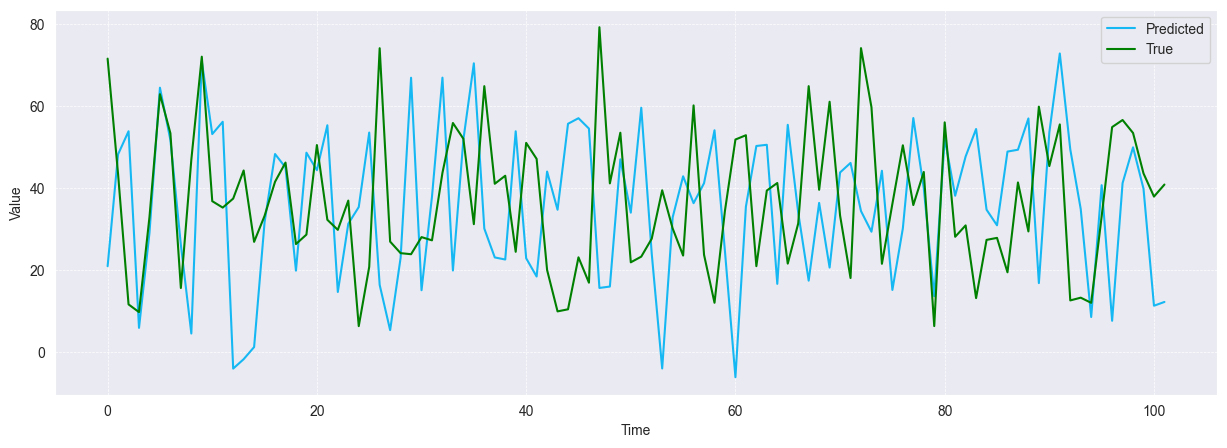

In [85]:
# Graphical representation of the model accuracy
start = 0
end = -1

_, axs_loss = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
test_loss_lst_plot, = axs_loss.plot(predictions.detach().numpy()[start:end], label='Predicted', color='#16b8f3')
train_loss_lst_plot, = axs_loss.plot(y_test[start:end], label='True', color='green')
axs_loss.legend(handles=[test_loss_lst_plot, train_loss_lst_plot])
axs_loss.grid(linestyle='--', linewidth=0.5)
axs_loss.set_xlabel('Time')
axs_loss.set_ylabel('Value')
pass